## optimization
- Objective Function: 𝑓(𝑥) This is the function that needs to be optimized.
- Variables: 𝑥 is the variable or set of variables that can be adjusted.
- Constraints: These are the restrictions or limitations on the variables.


## example:
- min x<sup>2</sup>
- min x<sup>2</sup>, but 1 < x < 5
- 錢多事少離家近

## how to find the optimal solution(s)
- gradient 𝑓'(𝑥)
- Moving toward the gradient: 𝑥−ℎ𝑓′(𝑥) generally decreases the value of 𝑓

In [ ]:
def gradient_descent(obj_fun, w, step_size, iters):
    for i in range(iters):
        w = w - step_size * obj_fun.grad(w)  # x + step_size * grad f(x)
    return w

In [ ]:
import numpy as np

class square_func:
    # (x - a) ** 2
    def __init__(self, a: float):
        self.a = a

    def fval(self, x: float):
        return (x - self.a) ** 2

    def grad(self, x: float):
        return 2 * (x - self.a)

obj_fun = square_func(3.14159)
gradient_descent(obj_fun, .1, 0.4, 100)

3.14159

\

In [ ]:
import numpy as np

class simple_linear_regression_fun:
    # function for 1/2 sum_i |a x_i + b - y_i|^2
    def __init__(self, x, y):
        self.y = y # (n, ) ndarray
        self.x = x # (n, ) ndarray

    def fval(self, w: np.array):
        a, b = w[0], w[1]
        return 0.5 * np.sum((
            a * self.x + b - self.y) ** 2)

    def grad(self, w: np.array):
        a, b = w[0], w[1]
        delta = (a * self.x + b - self.y)
        return np.array([delta.dot(self.x), delta.sum()])

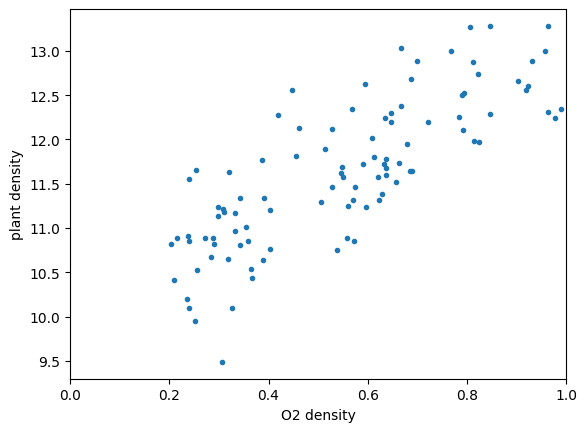

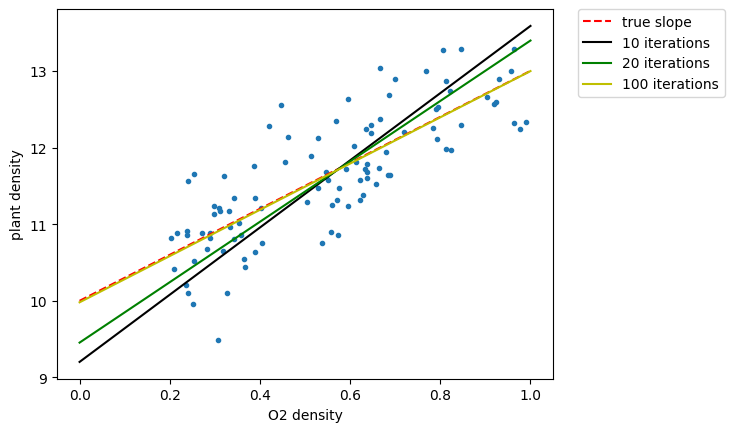

In [ ]:
import numpy as np
import matplotlib.pylab as plt

o2_density = 0.2 + np.random.rand(100) * 0.8
plant_density = 3.0 * o2_density + 10.0 + 0.5 * np.random.randn(100)

plt.plot(o2_density, plant_density, '.')
plt.xlabel('O2 density')
plt.ylabel('plant density')
plt.xlim((0, 1))
plt.show()

obj_fun = simple_linear_regression_fun(o2_density, plant_density)

w0 = [0.0, 0.0]
step_size = 0.01

a10, b10 = gradient_descent(obj_fun, w0, step_size, 10)
a20, b20 = gradient_descent(obj_fun, w0, step_size, 20)
a100, b100 = gradient_descent(obj_fun, w0, step_size, 100)
xplot = np.linspace(0.0, 1.0, num = 10)

plt.plot(o2_density, plant_density, '.')
plt.plot(xplot, 3.0 * xplot + 10.0, 'r--', label = 'true slope')
plt.plot(xplot, a10 * xplot + b10, 'k', label = '10 iterations')
plt.plot(xplot, a20 * xplot + b20, 'g', label = '20 iterations')
plt.plot(xplot, a100 * xplot + b100, 'y', label = '100 iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('O2 density')
plt.ylabel('plant density')
plt.show()

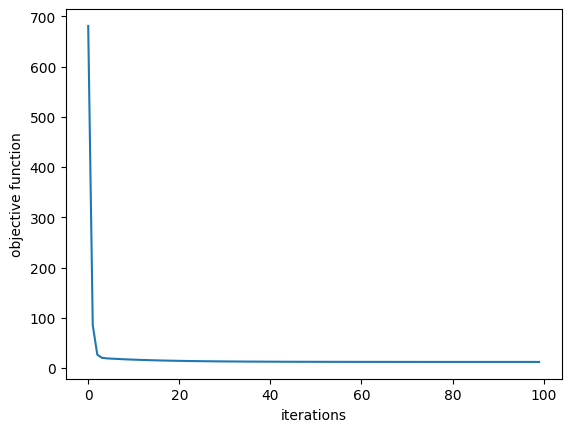

In [ ]:
w0 = [0.0, 0.0]
step_size = 0.01
iters = 100

obj_vals = []
for i in range(iters):
    w0 = gradient_descent(obj_fun, w0, step_size, 1)
    obj_vals.append(obj_fun.fval(w0))

plt.plot(obj_vals)
plt.xlabel('iterations')
plt.ylabel('objective function')
plt.show()

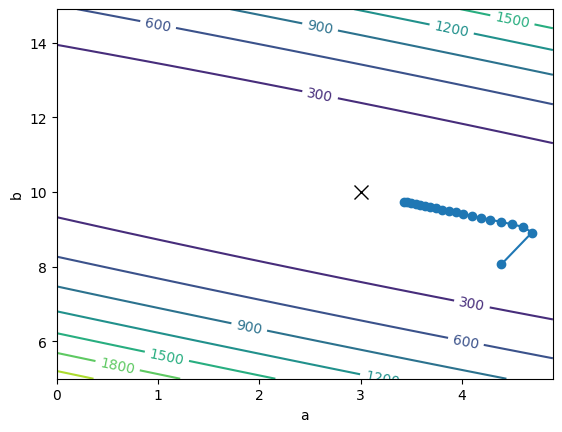

In [ ]:
ws = np.zeros((20, 2))
w0 = [0, 0]
for i in range(20):
    w0 = gradient_descent(obj_fun, w0, step_size, 2)
    ws[i, :] = np.array(w0)

Ag, Bg = np.meshgrid(np.arange(0.0, 5.0, 0.1), np.arange(5.0, 15.0, 0.1))
Wg = np.vstack([Ag.flatten(), Bg.flatten()])
Z = np.array(list(map(obj_fun.fval, Wg.T)))

CS = plt.contour(Ag, Bg, Z.reshape(Ag.shape))
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(ws[:, 0], ws[:, 1], '-o')
plt.xlabel('a')
plt.ylabel('b')
plt.plot(3, 10, 'kx', markersize=10)

## 分類
- 假設現在有x是栽培植物環境的氧氣量
- y是培養三十天後,植物是否存活
- 如何根據環境氧氣量預測植物是否存活?

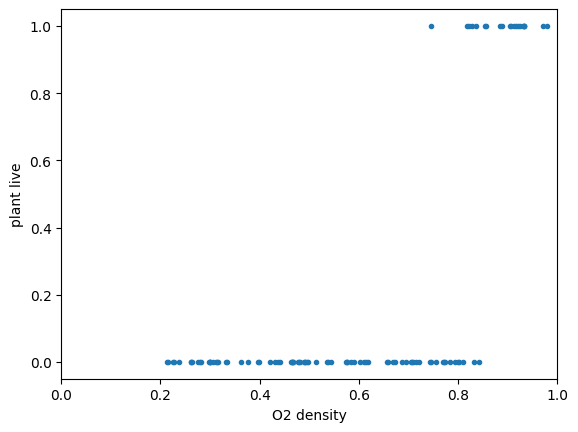

In [ ]:
o2_density = 0.2 + np.random.rand(100) * 0.8
plant_live = ((3.0 * o2_density + 0.2 * np.random.randn(100)) > 2.5).astype('int')
plt.plot(o2_density, plant_live, '.')
plt.xlabel('O2 density')
plt.ylabel('plant live')
plt.xlim((0, 1))
plt.show()

In [ ]:
import numpy as np

class logistic_regression_fun:
    # Logistic regression function for binary classification
    def __init__(self, x, y):
        self.y = y # (n, ) ndarray
        self.x = x # (n, d) ndarray - assuming each row is a sample and each column is a feature

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def fval(self, w: np.array):
        x, y = self.x, self.y
        a, b = w[0], w[1]
        z = a * x + b
        predictions = self.sigmoid(z)
        # Logistic loss (cross-entropy)
        return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    def grad(self, w: np.array):
        x, y = self.x, self.y
        a, b = w[0], w[1]
        z = a * x + b
        predictions = self.sigmoid(z)
        # Gradient of the logistic loss
        error = predictions - y
        return np.array([np.sum(x * error), np.sum(error)])

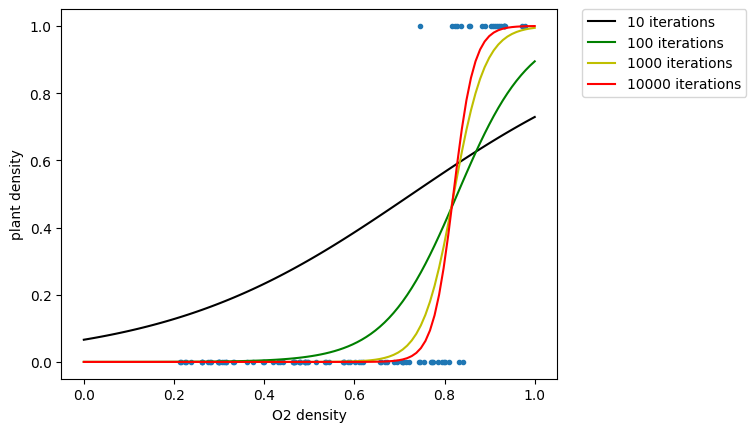

In [ ]:
import numpy as np
import matplotlib.pylab as plt
obj_fun = logistic_regression_fun(o2_density, plant_live)

w0 = [0.0, 0.0]
step_size = 0.1

a10, b10 = gradient_descent(obj_fun, w0, step_size, 10)
a100, b100 = gradient_descent(obj_fun, w0, step_size, 100)
a1000, b1000 = gradient_descent(obj_fun, w0, step_size, 1000)
a10000, b10000 = gradient_descent(obj_fun, w0, step_size, 10000)
xplot = np.linspace(0.0, 1.0, num = 100)

plt.plot(o2_density, plant_live, '.')
plt.plot(xplot, obj_fun.sigmoid(a10 * xplot + b10), 'k', label = '10 iterations')
plt.plot(xplot, obj_fun.sigmoid(a100 * xplot + b100), 'g', label = '100 iterations')
plt.plot(xplot, obj_fun.sigmoid(a1000 * xplot + b1000), 'y', label = '1000 iterations')
plt.plot(xplot, obj_fun.sigmoid(a10000 * xplot + b10000), 'r', label = '10000 iterations')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('O2 density')
plt.ylabel('plant density')
plt.show()

In [ ]:
x: (sample, ndim)
y: (sample, ), binary
a: (ndim, )
b: (ndim, )
z = sigmoid(ax + b)
min y logz + (1 - y) log(1 - z)

In [ ]:
x: (sample, ndim)
y: (sample, ), binary
a1, a2, b1, b2: (1, )
z1 = sigmoid(a1x + b1)
z2 = sigmoid(a2x + b2)
z = sigmoid(c1 z1 + c2 z2 + c3)
min y logz + (1 - y) log  (1 - z)